In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Countries With the Highest Suicide Rate


In [3]:
# Let's find countries with the highest suicide rate.
df_top = df.groupby('country', as_index=False).mean().sort_values(by=['suicides/100k pop'], ascending=False).head(25)

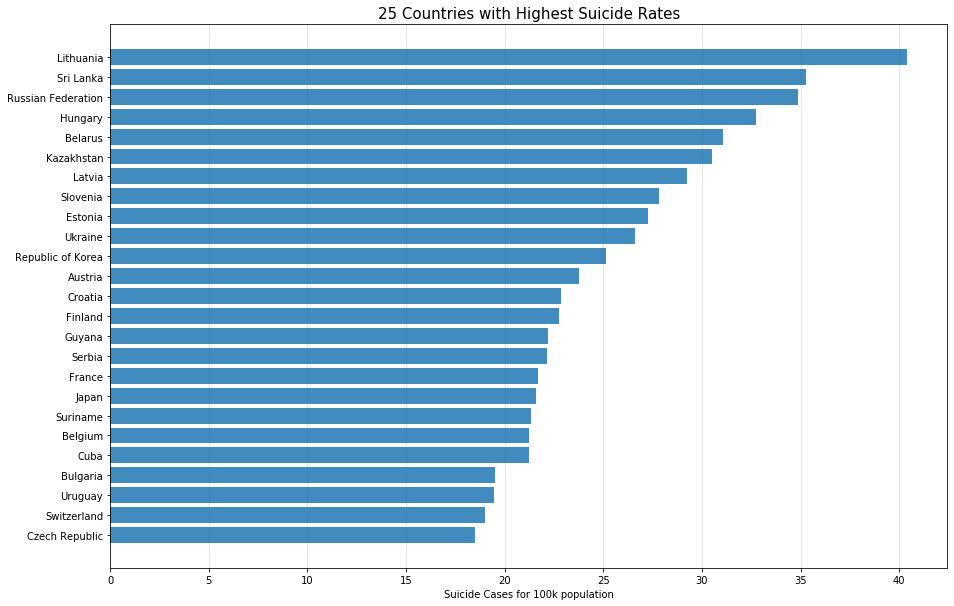

In [4]:
countries = df_top.country.iloc[::-1]
rate = df_top['suicides/100k pop'].iloc[::-1]

plt.figure(figsize=(15,10))
plt.title('25 Countries with Highest Suicide Rates', size=15)
plt.grid(axis='x', alpha=0.4)
plt.xlabel('Suicide Cases for 100k population')
plt.barh(countries, rate, zorder=2, alpha=0.85)

plt.show()

## Scatter Plot: Suicide Rate vs GDP per Capita

In [5]:
df_scatter = df.groupby('country', as_index=False).mean()
df_scatter.head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455
1,Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185
2,Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774
3,Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463
4,Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,24221.642857


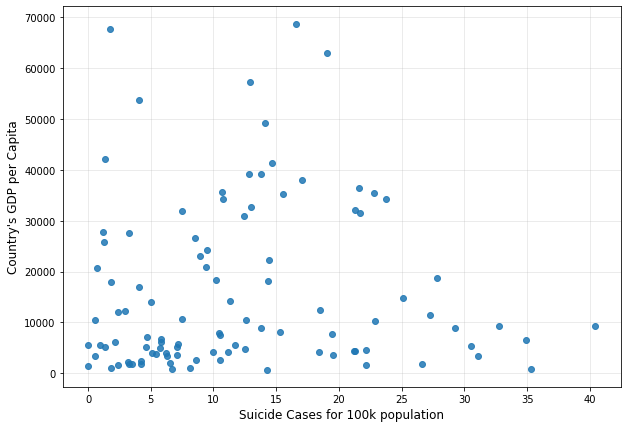

In [6]:
# Let's build a scatterplot and see if there are some patternal dependency of suicide rates on country's GDP
plt.figure(figsize=(10,7))
spx = df_scatter['suicides/100k pop']
spy = df_scatter['gdp_per_capita ($)']
plt.xlabel('Suicide Cases for 100k population', size=12)
plt.ylabel("Country's GDP per Capita", size=12)
plt.grid(alpha=0.3)
plt.scatter(spx, spy, zorder=2, alpha=0.85)
plt.show()
# Doesn't seem to be any viable patterns here.

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Gender Analysis

In [8]:
# Let's see about the genders.
df_gender = df.groupby('sex', as_index=False).mean() 
df_gender
# According to this particular dataset, men commit suicide 3.75 times more often than women.

,sex,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,female,2001.258375,112.114306,1.888769e+06,5.392866,0.776601,16866.464414
1,male,2001.258375,373.034508,1.800818e+06,20.239329,0.776601,16866.464414


In [9]:
# Trying to find countries with the largest difference.
df_gc = df.groupby(['country', 'sex'], as_index=False).mean()
df_gc.iloc[150:].head(20)

,country,sex,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
150,Russian Federation,female,2002.000000,1323.024691,1.222661e+07,11.601049,NaN,6518.814815
151,Russian Federation,male,2002.000000,6144.518519,1.055612e+07,58.183704,NaN,6518.814815
152,Saint Kitts and Nevis,female,1991.000000,0.000000,3.400000e+03,0.000000,NaN,5525.000000
153,Saint Kitts and Nevis,male,1991.000000,0.000000,3.116667e+03,0.000000,NaN,5525.000000
154,Saint Lucia,female,1999.750000,0.202381,1.191858e+04,2.417917,0.717429,5789.035714
155,Saint Lucia,male,1999.750000,1.166667,1.135832e+04,11.987560,0.717429,5789.035714
156,Saint Vincent and Grenadines,female,2002.120000,0.073333,8.092327e+03,0.718000,0.706714,4954.640000
157,Saint Vincent and Grenadines,male,2002.120000,0.753333,8.158753e+03,10.792867,0.706714,4954.640000
158,San Marino,female,2001.333333,0.000000,2.248167e+03,0.000000,NaN,53663.666667
159,San Marino,male,2001.333333,0.222222,2.131000e+03,8.090000,NaN,53663.666667


In [10]:
# a little abracadabra here to calculate the ratio between male and female suicide rates for each country.
gender_diff = {}
for n, i in enumerate(df_gc['country']):
    if n % 2 == 0:
        diff = df_gc['suicides/100k pop'].iloc[n+1] / df_gc['suicides/100k pop'].iloc[n]
        gender_diff[i] = diff
# gd_df = pd.DataFrame.from_dict(gender_diff, orient='index')
# gd_df.sort_values(0, ascending=False).head(30)

C:\conda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\conda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [11]:
# del gender_diff['Oman']
# del gender_diff['San Marino']
gd_df = pd.DataFrame(gender_diff.items(), columns=['country', 'gend_diff'])
gd_df_sorted = gd_df.sort_values('gend_diff', ascending=False).head(30)
gd_df_sorted.head()

,country,gend_diff
79,San Marino,inf
65,Oman,inf
78,Saint Vincent and Grenadines,15.031848
81,Seychelles,14.149555
1,Antigua and Barbuda,10.468630


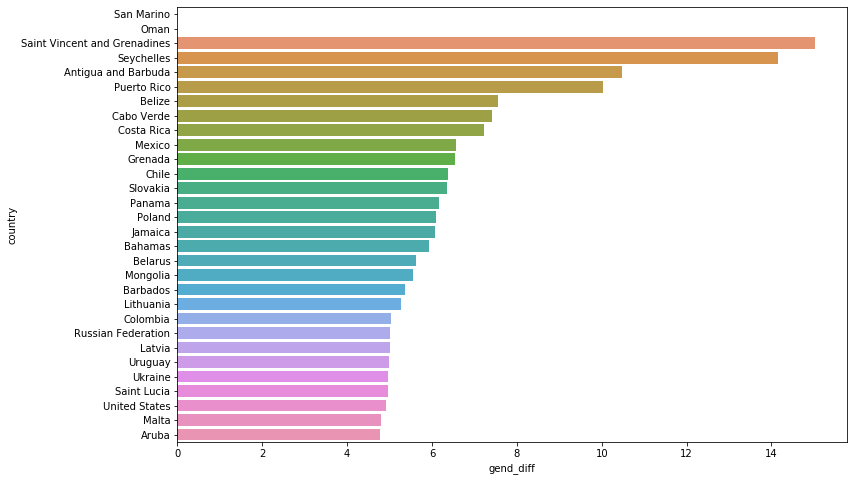

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(y='country', x='gend_diff', data=gd_df_sorted, orient='h')

## Age Analysis

In [15]:
# Let's look for patterns in ages
df_gender = df.groupby('age', as_index=False).mean().sort_values('suicides/100k pop', ascending=False)
df_gender
# A clear pattern here: as people grow older, chances of suicide rise

,age,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
5,75+ years,2001.275312,140.697544,5.737357e+05,23.955409,0.776601,16876.57346
4,55-74 years,2001.275312,357.269065,1.896434e+06,16.155579,0.776601,16876.57346
2,35-54 years,2001.275312,528.250969,3.096917e+06,14.947441,0.776601,16876.57346
1,25-34 years,2001.275312,242.118053,1.817773e+06,12.186885,0.776601,16876.57346
0,15-24 years,2001.275312,174.179664,1.861902e+06,8.947154,0.776601,16876.57346
3,5-14 years,2001.173102,11.337093,1.821842e+06,0.620041,0.776601,16815.56833


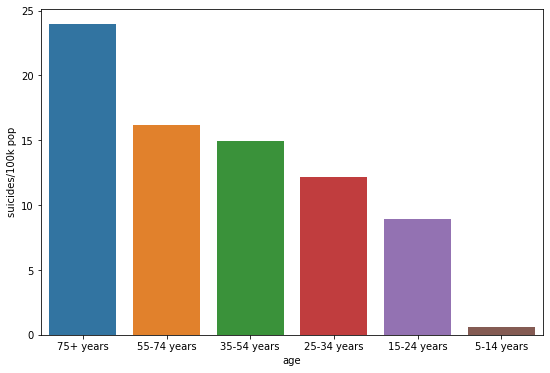

In [16]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.barplot(x='age', y='suicides/100k pop', data=df_gender)
# we can add both genders here

In [2]:
#countries = df_top.country.iloc[::-1]
#rate = df_top['suicides/100k pop'].iloc[::-1]

#plt.figure(figsize=(15,10))
#plt.title('25 Countries with Highest Suicide Rates', size=15)
#plt.grid(axis='x', alpha=0.4)
#plt.xlabel('Suicide Cases for 100k population')
#plt.bar(countries, rate, zorder=2, alpha=0.85)

# plt.show()
# reshaped this to horizontal bar

In [18]:
# Let's look for patterns in ages
df_year = df.groupby('year', as_index=False).mean().sort_values('suicides/100k pop', ascending=False)
df_year
# A clear pattern here: as people grow older, chances of suicide rise

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
10,1995,260.196581,1.700384e+06,15.662671,0.736429,12669.346154
11,1996,267.018398,1.798991e+06,15.305422,NaN,12554.909091
12,1997,260.546537,1.843064e+06,14.954361,NaN,12336.142857
13,1998,263.281646,1.819812e+06,14.926920,NaN,12137.898734
14,1999,257.147590,1.783497e+06,14.532038,NaN,12832.192771
9,1994,284.390931,1.897977e+06,14.073272,NaN,11567.102941
15,2000,247.899225,1.743438e+06,13.941328,0.752961,12466.546512
8,1993,284.057692,1.962073e+06,13.833705,NaN,10553.584615
17,2002,248.154070,1.765652e+06,13.786550,NaN,12613.779070
16,2001,237.359848,1.662467e+06,13.519138,NaN,12005.579545


## Timeline

In [19]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [20]:
df_years_sum = df.groupby('year', as_index=False).sum()
# Let's drop the 2016, as there's data not for the whole year
df_years_sum = df_years_sum.drop(index=31)
df_years_sum

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,116063,1008600086,6811.89,310.428,3508548
1,1986,120670,1029909613,6579.84,0.000,4104636
2,1987,126842,1095029726,7545.45,0.000,5645760
3,1988,121026,1054094424,7473.13,0.000,5870508
4,1989,160244,1225514347,8036.54,0.000,6068424
5,1990,193361,1466620100,9878.75,429.480,7531260
6,1991,198020,1489988384,10321.06,0.000,7782096
7,1992,211473,1569539447,10528.88,0.000,8195232
8,1993,221565,1530416654,10790.29,0.000,8231796
9,1994,232063,1548749372,11483.79,0.000,9438756


In [39]:
df_years_mean = df.groupby('year', as_index=False).sum()
# Let's drop the 2016, as there's data not for the whole year
df_years_mean = df_years_mean.drop(index=31)

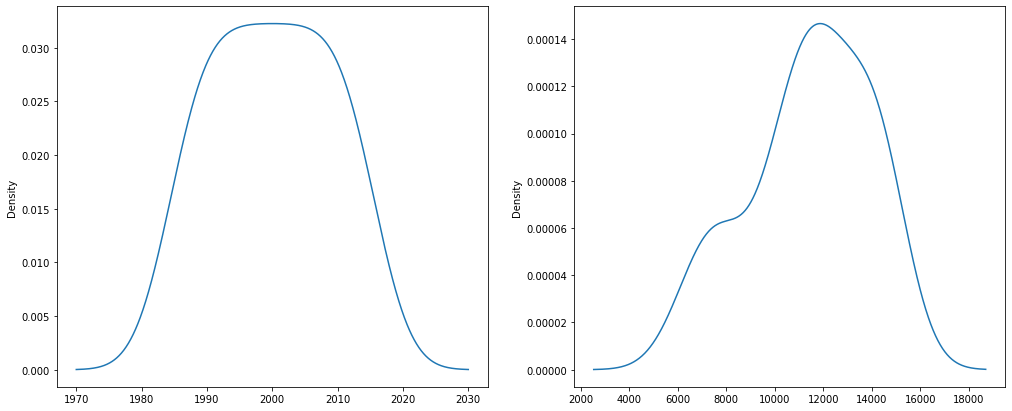

In [47]:
fig = plt.figure(figsize=(17,7))

plt.subplot2grid((1,2), (0,0))
df_years_mean.year.plot(kind='kde')

plt.subplot2grid((1,2
                 ), (0,1))
df_years_mean['suicides/100k pop'].plot(kind='kde')

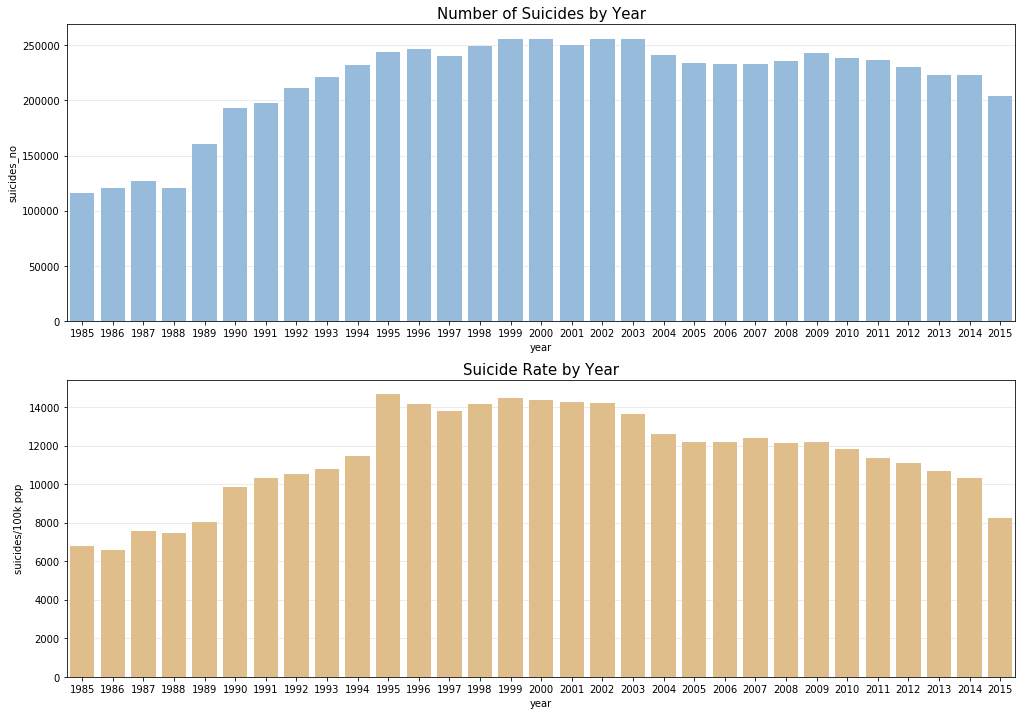

In [41]:
fig = plt.figure(figsize=(17,12))
plt.subplot2grid((2,1), (0,0))
plt.title('Number of Suicides by Year', size=15)
plt.grid(alpha=0.3)
sns.barplot(x='year', y='suicides_no', color="#8ABCE7", zorder=2, data=df_years_sum)

plt.subplot2grid((2,1), (1,0))
plt.title('Suicide Rate by Year', size=15)
plt.grid(alpha=0.3)
sns.barplot(x='year', y='suicides/100k pop', zorder=2, color="#EEC07E", data=df_years_mean)

Next, we can make these 4 graphs on the same plot:
1. GDP by year
2. s_rate by year
3. HDI by 5 years
4. snum by year

## Dataset Analysis for Russia

In [23]:
df_rus = df.loc[df['country'] == 'Russian Federation']
df_rus.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,NaN,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,NaN,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,NaN,"506,500,173,960",3740,G.I. Generation


In [24]:
df_rus.groupby('year').mean().sort_values('suicides/100k pop', ascending=False)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1994,5118.333333,1.153968e+07,47.303333,NaN,2853.0
1995,5045.666667,1.159059e+07,45.615000,NaN,2844.0
1996,4792.583333,1.160605e+07,43.856667,NaN,2813.0
1993,4653.833333,1.147440e+07,43.505000,NaN,3160.0
1999,4747.833333,1.155982e+07,42.510833,NaN,1412.0
1997,4562.166667,1.160693e+07,42.340833,NaN,2907.0
2001,4746.500000,1.146013e+07,42.054167,NaN,2229.0
2000,4718.250000,1.151714e+07,42.039167,NaN,1879.0
2002,4585.333333,1.138258e+07,40.712500,NaN,2527.0


## Treemap (Ages, Years)

In [25]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
fig = px.treemap(df_rus, path = [px.Constant('rus'), 'age', 'year'], values = 'suicides/100k pop', color = 'gdp_per_capita ($)')
pyo.plot(fig)

'temp-plot.html'

## Treemap (Ages, Gender)

In [26]:
fig = px.treemap(df_rus, path = [px.Constant('rus'), 'age', 'sex'], values = 'suicides/100k pop', color = 'suicides_no')
pyo.plot(fig)
# This is interesting. Here, we see that the number of suicides for old males and females are almost equal. 
# However, the suicide rate for males is 3 times higher.
# This can only mean that there are 3 times more 75+ year old women than 75+ year old men.

'temp-plot.html'

In [27]:
fig = px.treemap(df_rus, path = [px.Constant('rus'), 'year', 'sex'], values = 'suicides/100k pop', color = 'suicides_no')
pyo.plot(fig)
# Here we can see that 90's were rough

'temp-plot.html'

In [28]:
fig = px.treemap(df_rus, path = [px.Constant('rus'), 'year', 'sex'], values = 'suicides/100k pop', color = 'gdp_per_capita ($)')
pyo.plot(fig)
# Here we can see that when GDP per capita had a hude growth, the suicide rate significantly lowered.

'temp-plot.html'

## Treemap with cuicide number by countries

In [29]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [30]:
df_country = df.groupby('country', as_index=False).sum()
df_country.head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,527796,1970,62325467,924.76,32.304,490788
1,Antigua and Barbuda,647832,11,1990228,179.14,28.140,3385212
2,Argentina,744000,82219,1035985431,3894.59,93.552,2944044
3,Armenia,596832,1905,77348173,976.21,66.252,558428
4,Aruba,336720,101,1259677,1596.52,0.000,4069236


In [4]:
#fig = px.treemap(df, path = [px.Constant('world'), 'sex', 'country'], values = 'suicides/100k pop', color = 'gdp_per_capita ($)')
#pyo.plot(fig)

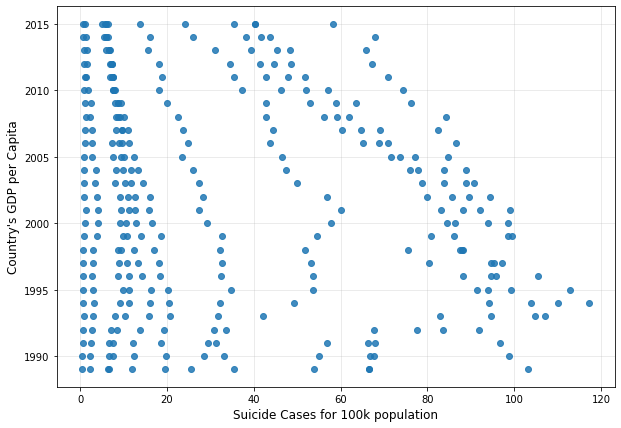

In [32]:
# Let's build a scatterplot and see if there are some patternal dependency of suicide rates on country's GDP
plt.figure(figsize=(10,7))
rusx = df_rus['suicides/100k pop']
rusy = df_rus['year']
plt.xlabel('Suicide Cases for 100k population', size=12)
plt.ylabel("Country's GDP per Capita", size=12)
plt.grid(alpha=0.3)
plt.scatter(rusx, rusy, zorder=2, alpha=0.85)
plt.show()
# Doesn't seem to be any viable patterns here.

In [ ]:
df.head()

In [ ]:
df["year"]

In [5]:
import plotly.express as px

fig = px.scatter(df, x='suicides/100k pop', y='year', size='gdp_per_capita ($)', hover_name='country')
fig.show()
# unsuccessful

NameError: name 'df' is not defined

In [ ]:
df.head()

In [34]:
df_top = df.groupby('country', as_index=False).mean().sort_values(by=['suicides/100k pop'], ascending=False)
df_top.head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
52,Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.803500,9280.549618
87,Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.638000,904.272727
75,Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,NaN,6518.814815
40,Hungary,2003.419355,238.358065,8.020782e+05,32.761516,0.803875,9370.051613
11,Belarus,2001.095238,237.666667,7.832234e+05,31.075913,0.771200,3333.904762


In [35]:
fig = px.scatter(df_top, x='gdp_per_capita ($)', y='suicides_no', size='suicides/100k pop', hover_name='country',
                width=1100, height=900)
fig.show()
# well, we can see that things are sad in Russia

In [ ]:
df_top.head()

In [36]:
fig = px.scatter_geo(df, locations="country",
                     hover_name="country", size="suicides/100k pop")
fig.show()
#here, need to add the country labels